
# PREDICT CAR PURCHASING DOLLAR AMOUNT USING ANNs 




You are working as a car salesman and you would like to develop a model to predict the total dollar amount that customers are willing to pay given the following attributes: 
- Customer Name
- Customer e-mail
- Country
- Gender
- Age
- Annual Salary 
- Credit Card Debt 
- Net Worth 

The model should predict: 
- Car Purchase Amount 

#  LIBRARIES IMPORT


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  IMPORT DATASET

In [3]:
car_df = pd.read_csv('Car_Purchasing_Data.csv', encoding='ISO-8859-1')


In [22]:
car_df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [26]:
car_df.shape

(500, 9)

In [27]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Customer Name          500 non-null object
Customer e-mail        500 non-null object
Country                500 non-null object
Gender                 500 non-null int64
Age                    500 non-null float64
Annual Salary          500 non-null float64
Credit Card Debt       500 non-null float64
Net Worth              500 non-null float64
Car Purchase Amount    500 non-null float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.2+ KB


In [28]:
car_df.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [29]:
car_df.corr()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
Gender,1.000000,-0.064481,-0.036499,0.024193,-0.008395,-0.066408
Age,-0.064481,1.000000,0.000130,0.034721,0.020356,0.632865
Annual Salary,-0.036499,0.000130,1.000000,0.049599,0.014767,0.617862
Credit Card Debt,0.024193,0.034721,0.049599,1.000000,-0.049378,0.028882
Net Worth,-0.008395,0.020356,0.014767,-0.049378,1.000000,0.488580
Car Purchase Amount,-0.066408,0.632865,0.617862,0.028882,0.488580,1.000000


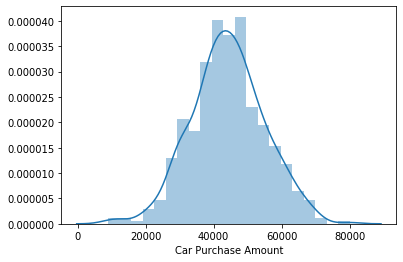

In [30]:
sns.distplot(car_df['Car Purchase Amount'])

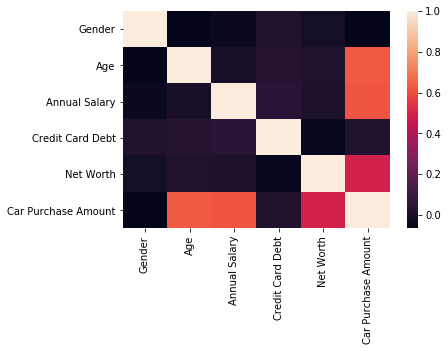

In [32]:
sns.heatmap(car_df.corr())

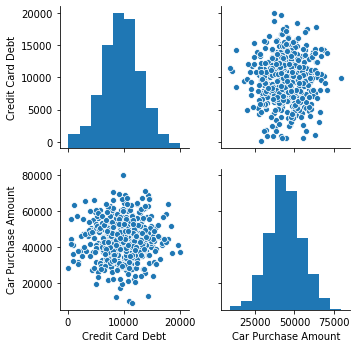

In [47]:
sns.pairplot(car_df, vars=['Credit Card Debt','Car Purchase Amount'])

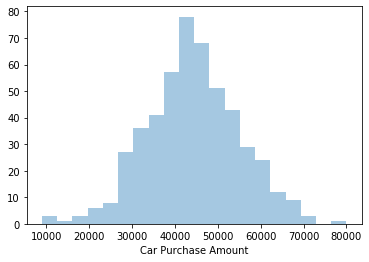

In [37]:
sns.distplot(car_df['Car Purchase Amount'], kde=False, bins =20)

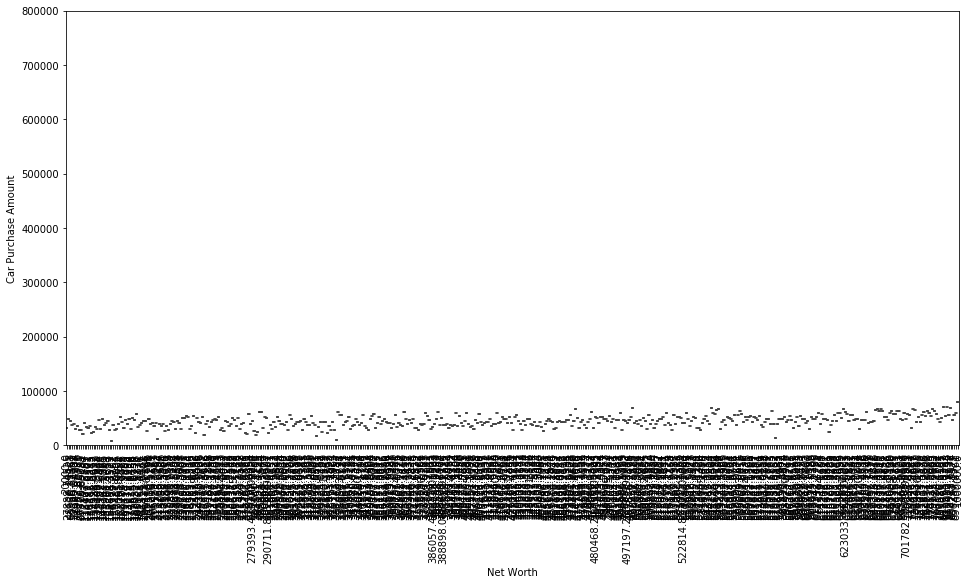

In [49]:
var = 'Net Worth'
data = pd.concat([car_df['Car Purchase Amount'], car_df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y='Car Purchase Amount', data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

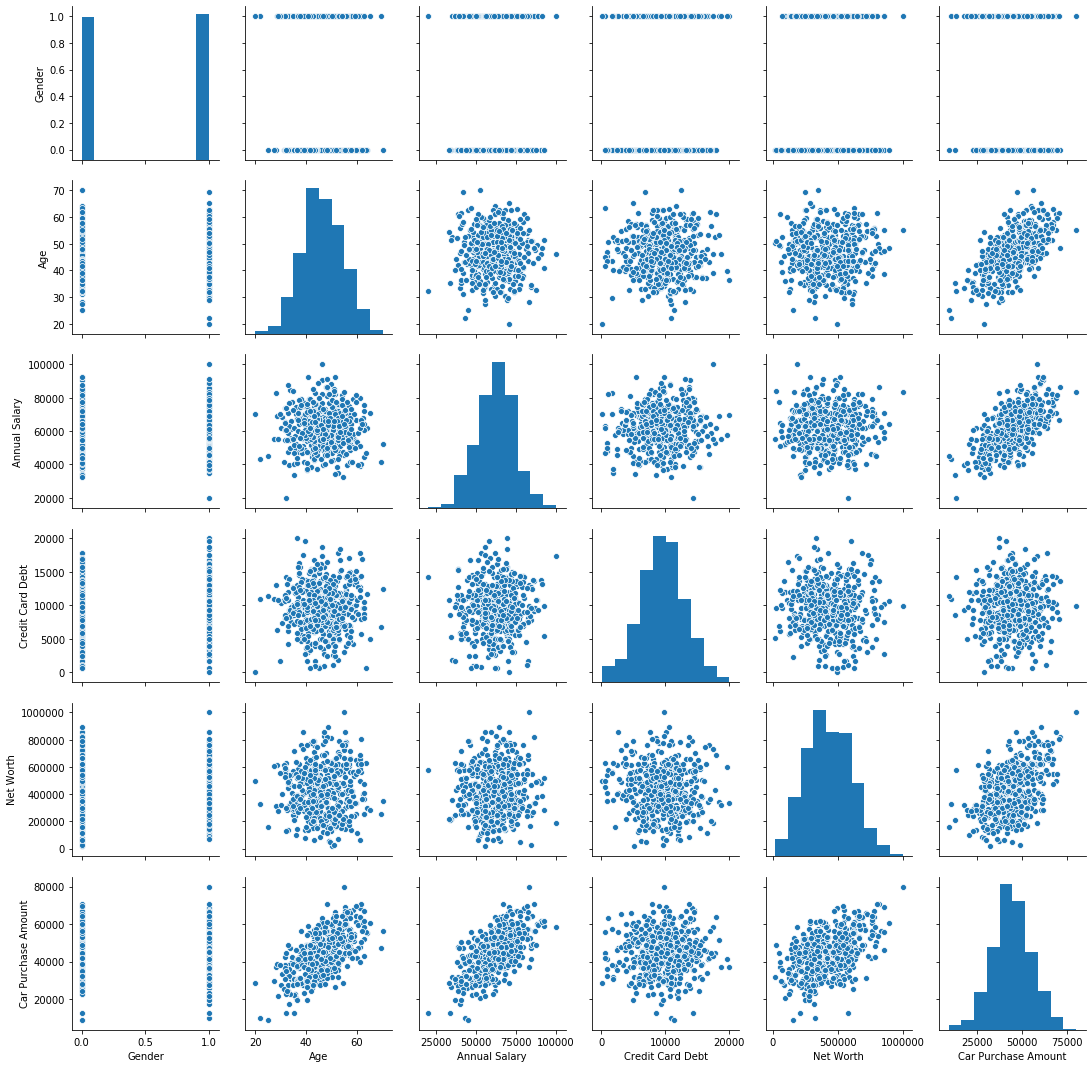

In [5]:
sns.pairplot(car_df)

# CREATE TESTING AND TRAINING DATASET/DATA CLEANING

In [6]:
X = car_df.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis = 1)

In [7]:
X

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth
0,0,41.851720,62812.09301,11609.380910,238961.2505
1,0,40.870623,66646.89292,9572.957136,530973.9078
2,1,43.152897,53798.55112,11160.355060,638467.1773
3,1,58.271369,79370.03798,14426.164850,548599.0524
4,1,57.313749,59729.15130,5358.712177,560304.0671
5,1,56.824893,68499.85162,14179.472440,428485.3604
6,1,46.607315,39814.52200,5958.460188,326373.1812
7,1,50.193016,51752.23445,10985.696560,629312.4041
8,0,46.584745,58139.25910,3440.823799,630059.0274
9,1,43.323782,53457.10132,12884.078680,476643.3544


In [38]:
y = car_df['Car Purchase Amount']
y.shape

(500,)

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
X_scaled = scaler_x.fit_transform(X)


In [10]:
scaler_x.data_max_

array([1.e+00, 7.e+01, 1.e+05, 2.e+04, 1.e+06])

In [11]:
scaler_x.data_min_

array([    0.,    20., 20000.,   100., 20000.])

In [12]:
print(X_scaled)

[[0.         0.4370344  0.53515116 0.57836085 0.22342985]
 [0.         0.41741247 0.58308616 0.476028   0.52140195]
 [1.         0.46305795 0.42248189 0.55579674 0.63108896]
 ...
 [1.         0.67886994 0.61110973 0.52822145 0.75972584]
 [1.         0.78321017 0.37264988 0.69914746 0.3243129 ]
 [1.         0.53462305 0.51713347 0.46690159 0.45198622]]


In [13]:
X_scaled.shape

(500, 5)

In [14]:
y.shape

(500,)

In [15]:
y = y.values.reshape(-1,1)

In [16]:
y.shape

(500, 1)

In [17]:
y

array([[35321.45877],
       [45115.52566],
       [42925.70921],
       [67422.36313],
       [55915.46248],
       [56611.99784],
       [28925.70549],
       [47434.98265],
       [48013.6141 ],
       [38189.50601],
       [59045.51309],
       [42288.81046],
       [28700.0334 ],
       [49258.87571],
       [49510.03356],
       [53017.26723],
       [41814.72067],
       [43901.71244],
       [44633.99241],
       [54827.52403],
       [51130.95379],
       [43402.31525],
       [47240.86004],
       [46635.49432],
       [45078.40193],
       [44387.58412],
       [37161.55393],
       [49091.97185],
       [58350.31809],
       [43994.35972],
       [17584.56963],
       [44650.36073],
       [66363.89316],
       [53489.46214],
       [39810.34817],
       [51612.14311],
       [38978.67458],
       [10092.22509],
       [35928.52404],
       [54823.19221],
       [45805.67186],
       [41567.47033],
       [28031.20985],
       [27815.73813],
       [68678.4352 ],
       [68

In [18]:
scaler_y = MinMaxScaler()

y_scaled = scaler_y.fit_transform(y)


In [19]:
y_scaled

array([[0.37072477],
       [0.50866938],
       [0.47782689],
       [0.82285018],
       [0.66078116],
       [0.67059152],
       [0.28064374],
       [0.54133778],
       [0.54948752],
       [0.4111198 ],
       [0.70486638],
       [0.46885649],
       [0.27746526],
       [0.56702642],
       [0.57056385],
       [0.61996151],
       [0.46217916],
       [0.49157341],
       [0.50188722],
       [0.64545808],
       [0.59339372],
       [0.48453965],
       [0.53860366],
       [0.53007738],
       [0.50814651],
       [0.49841668],
       [0.3966416 ],
       [0.56467566],
       [0.6950749 ],
       [0.49287831],
       [0.12090943],
       [0.50211776],
       [0.80794216],
       [0.62661214],
       [0.43394857],
       [0.60017103],
       [0.42223485],
       [0.01538345],
       [0.37927499],
       [0.64539707],
       [0.51838974],
       [0.45869677],
       [0.26804521],
       [0.2650104 ],
       [0.84054134],
       [0.84401542],
       [0.35515157],
       [0.406

# TRAINING THE MODEL

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [40]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

model = Sequential()
model.add(Dense(25, input_dim=5, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 25)                150       
_________________________________________________________________
dense_2 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [42]:
epochs_hist = model.fit(X_train, y_train, epochs=20, batch_size=25,  verbose=1, validation_split=0.2)


Train on 300 samples, validate on 75 samples
Epoch 1/20
300/300 [==============================] - 0s 622us/step - loss: 0.1487 - val_loss: 0.0852
Epoch 2/20
300/300 [==============================] - 0s 86us/step - loss: 0.0452 - val_loss: 0.0228
Epoch 3/20
300/300 [==============================] - 0s 86us/step - loss: 0.0168 - val_loss: 0.0185
Epoch 4/20
300/300 [==============================] - 0s 90us/step - loss: 0.0141 - val_loss: 0.0123
Epoch 5/20
300/300 [==============================] - 0s 93us/step - loss: 0.0101 - val_loss: 0.0107
Epoch 6/20
300/300 [==============================] - 0s 100us/step - loss: 0.0090 - val_loss: 0.0091
Epoch 7/20
300/300 [==============================] - 0s 126us/step - loss: 0.0077 - val_loss: 0.0081
Epoch 8/20
300/300 [==============================] - 0s 136us/step - loss: 0.0066 - val_loss: 0.0072
Epoch 9/20
300/300 [==============================] - 0s 106us/step - loss: 0.0058 - val_loss: 0.0064
Epoch 10/20
300/300 [====================

# EVALUATING THE MODEL 

In [43]:
print(epochs_hist.history.keys())


dict_keys(['val_loss', 'loss'])


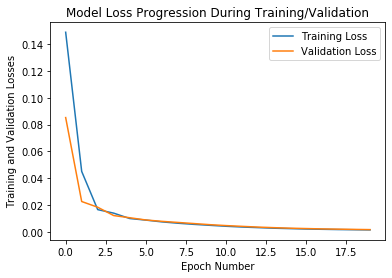

In [44]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])


In [45]:
# Gender, Age, Annual Salary, Credit Card Debt, Net Worth 


X_test_sample = np.array([[0, 0.4370344,  0.53515116, 0.57836085, 0.22342985]])
#X_test_sample = np.array([[1, 0.53462305, 0.51713347, 0.46690159, 0.45198622]])

y_predict_sample = model.predict(X_test_sample)

print('Expected Purchase Amount=', y_predict_sample)
y_predict_sample_orig = scaler_y.inverse_transform(y_predict_sample)
print('Expected Purchase Amount=', y_predict_sample_orig)

Expected Purchase Amount= [[0.41381925]]
Expected Purchase Amount= [[38381.164]]
